In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [12]:
users = pd.read_csv('takehome_users.csv', 
                    parse_dates=['creation_time'], 
                    encoding="ISO-8859-1")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [15]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [16]:
user_engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [17]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [18]:
print(users.isna().sum())
print(user_engagement.isna().sum())

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64
time_stamp    0
user_id       0
visited       0
dtype: int64


We have some missing values we need to take care of.

In [19]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)

These are just user_id's so we don't want to impute with the mean or median

In [20]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit = 's')

In [21]:
users['last_session_creation_time'] = users['last_session_creation_time'].fillna(users['creation_time'])

If a user doesn't have a time for their last session their creation time will be used as their last session.

Our objective is to find how many active users have logged on at least three times in a rolling 7 day window.

In [22]:
def rolling_window(df, freq='7D'):
    '''
    Creates a rolling count over a specific period, defaulted to seven days
    '''
    return df.rolling(freq, on='time_stamp')['visited'].count()

In [23]:
user_engagement['seven_day_window'] = user_engagement.groupby('user_id',
                                                             as_index = False,
                                                             group_keys = False).apply(rolling_window)

In [24]:
user_engagement.head()

,time_stamp,user_id,visited,seven_day_window
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [25]:
print(user_engagement.user_id.nunique())

8823


8,823 engaged users!

Need to identify which of these engaged users has been engaged more than 3 times.

In [26]:
adoption = user_engagement.loc[(user_engagement['seven_day_window'] >= 3)]

In [27]:
adoption

,time_stamp,user_id,visited,seven_day_window
9,2014-02-09 03:45:04,2,1,3.0
10,2014-02-13 03:45:04,2,1,3.0
27,2013-02-19 22:08:03,10,1,3.0
30,2013-03-02 22:08:03,10,1,3.0
31,2013-03-05 22:08:03,10,1,3.0
...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,6.0
207899,2014-05-24 11:04:47,11988,1,6.0
207900,2014-05-26 11:04:47,11988,1,5.0
207901,2014-05-27 11:04:47,11988,1,5.0


Need to drop duplicate user_id's

In [28]:
adoption = adoption.drop_duplicates('user_id', keep = 'first')

In [29]:
print(len(adoption))

1602


Over 1600 users have been on 3 or more times out of 8823 engaged users.

In [33]:
print(str(round(1600/8823, 2)* 100) + ' percent of our engaged users have been on 3 or more times in the rolling window.')

18.0 percent of our engaged users have been on 3 or more times in the rolling window.


In [34]:
adoption.head()

,time_stamp,user_id,visited,seven_day_window
9,2014-02-09 03:45:04,2,1,3.0
27,2013-02-19 22:08:03,10,1,3.0
312,2014-03-13 11:46:38,20,1,3.0
331,2014-03-23 06:29:09,33,1,3.0
354,2012-12-26 19:05:07,42,1,3.0


In [35]:
engaged_ids = list(adoption['user_id'])

In [36]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [37]:
users['high_engage'] = users['object_id'].isin(engaged_ids)

In [38]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,high_engage
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


Some features that may impact usage:

- Time between account creation and first login
- Time spent actively online: Creation of account and last session
- Number of referrals

In [39]:
df_firstLogin = user_engagement.groupby('user_id', as_index=False).agg({'time_stamp' : np.min})
df_firstLogin.columns=['object_id', 'firstLogin_time']

In [40]:
df_firstLogin.head()

,object_id,firstLogin_time
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20


In [47]:
users = users.merge(df_firstLogin, how='left', on='object_id')

In [48]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,high_engage,firstLogin_time
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False,2013-01-22 10:14:20


In [49]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
high_engage                      0
firstLogin_time               3177
dtype: int64

We have some na's for firstLogin_time. Fill them with original method, which was to replace that with creation_time.

In [50]:
users['delta_creation_login'] = (users['firstLogin_time'] - users['creation_time']).dt.days

In [52]:
users['delta_creation_login'] = users['delta_creation_login'].fillna(0)

In [53]:
users['firstLogin_time'] = users['firstLogin_time'].fillna(users['creation_time'])

Need to find the time difference between account creation and last login.

In [54]:
users['account_usage'] = (users['last_session_creation_time'] - users['creation_time']).dt.days

In [55]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,high_engage,firstLogin_time,delta_creation_login,account_usage
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,2014-04-22 03:53:30,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True,2013-11-15 03:45:04,0.0,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False,2013-03-19 23:14:52,0.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False,2013-05-22 08:09:28,1.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False,2013-01-22 10:14:20,5.0,5


Now finding number of referrals by user_id.

In [56]:
referral = pd.DataFrame(users['invited_by_user_id'].value_counts()).reset_index()

In [57]:
referral

,index,invited_by_user_id
0,0.0,5583
1,10741.0,13
2,2527.0,12
3,1525.0,11
4,2308.0,11
...,...,...
2560,7941.0,1
2561,4134.0,1
2562,6101.0,1
2563,129.0,1


Need to change the col names to make the merge easier.

In [58]:
referral.columns = ['object_id', 'num_referrals']

In [59]:
users = users.merge(referral, how='left', on='object_id')

In [60]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
high_engage                      0
firstLogin_time                  0
delta_creation_login             0
account_usage                    0
num_referrals                 9436
dtype: int64

If there's an NA in num_referrals, we can assume the number of referrals for that user_id is 0.

In [61]:
users['num_referrals'] = users['num_referrals'].fillna(0)

In [62]:
users.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
high_engage                   0
firstLogin_time               0
delta_creation_login          0
account_usage                 0
num_referrals                 0
dtype: int64

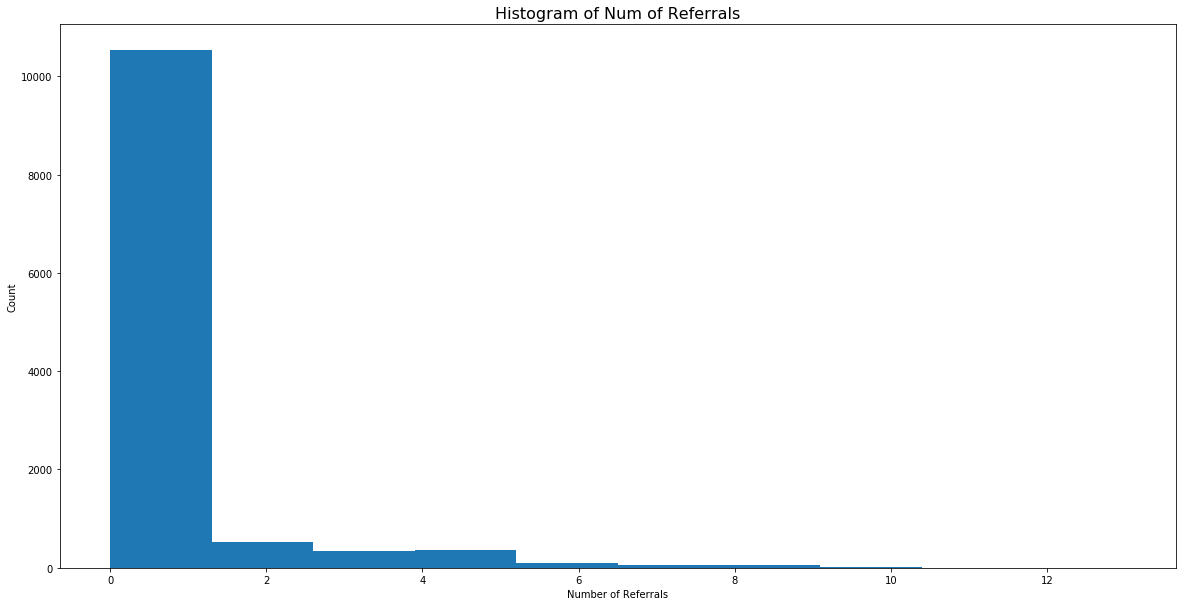

In [67]:
fig = plt.figure(figsize=(20, 10))

plt.hist(users['num_referrals'])
plt.title("Histogram of Num of Referrals", size = 16)
plt.xlabel("Number of Referrals", size = 10)
plt.ylabel('Count', size = 10)

plt.savefig('hist_num_referrals.png')

In [68]:
users.num_referrals.describe()

count    12000.000000
mean         0.534750
std          1.350473
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: num_referrals, dtype: float64

## EDA on some new features

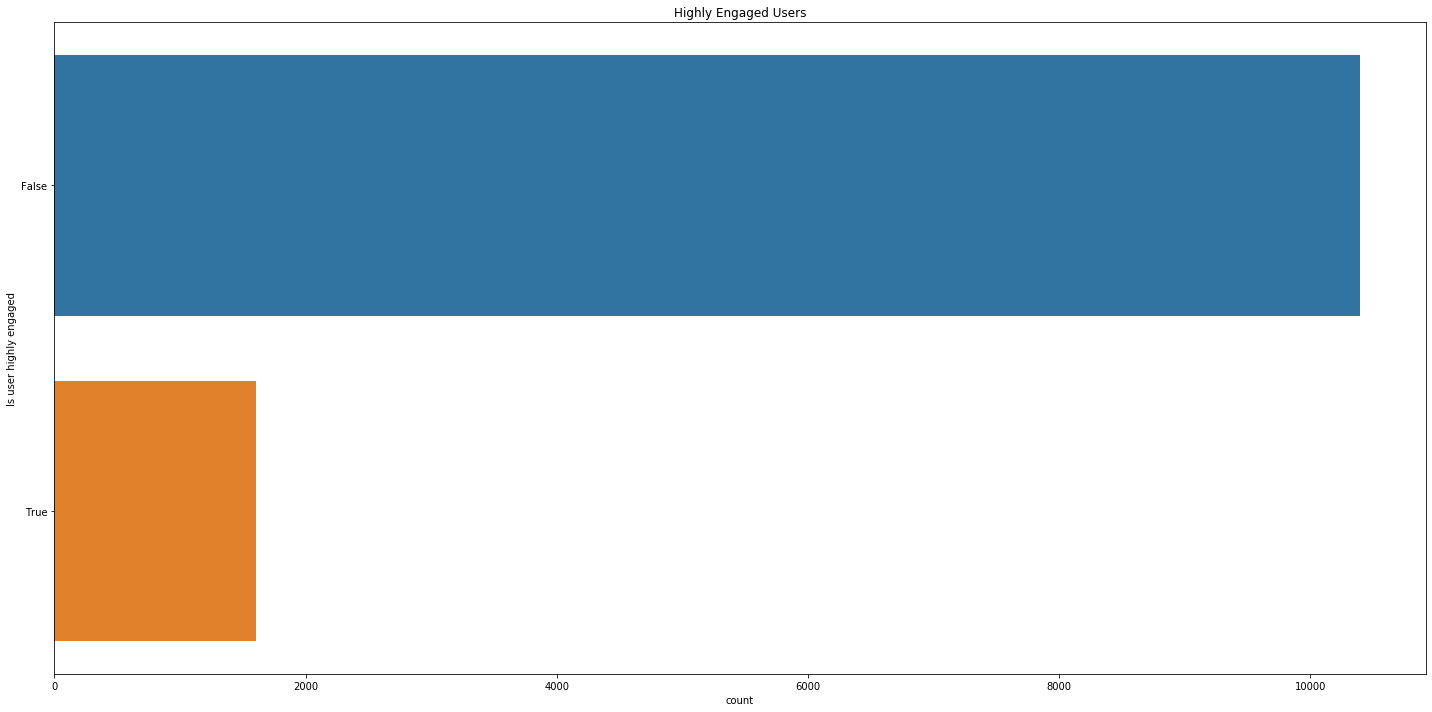

In [82]:
fig = plt.figure(figsize = (20, 10))

sns.countplot(y = 'high_engage', data = users)

plt.title('Highly Engaged Users')
plt.ylabel("Is user highly engaged")

plt.tight_layout()

plt.savefig('countplot_highly_engaged_users.png')

high_engage is target

## Modeling

In [115]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'high_engage', 'firstLogin_time', 'delta_creation_login',
       'account_usage', 'num_referrals', 'influencer_size', 'invited'],
      dtype='object')

In [116]:
users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
high_engage                             bool
firstLogin_time               datetime64[ns]
delta_creation_login                 float64
account_usage                          int64
num_referrals                        float64
influencer_size                       object
invited                                int64
dtype: object

In [88]:
users.invited_by_user_id.unique().sum()

15272193.0

Using this column to create another categorical feature.

In [89]:
invitation = [lambda x: 1 if x != 0 else 0]

In [90]:
users['invited'] = df['invited_by_user_id'].apply(invitation)

In [91]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,high_engage,firstLogin_time,delta_creation_login,account_usage,num_referrals,influencer_size,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,2014-04-22 03:53:30,0.0,0,0.0,S,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True,2013-11-15 03:45:04,0.0,136,0.0,M,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False,2013-03-19 23:14:52,0.0,0,1.0,L,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False,2013-05-22 08:09:28,1.0,1,0.0,L,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False,2013-01-22 10:14:20,5.0,5,0.0,L,1


In [117]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'high_engage', 'firstLogin_time', 'delta_creation_login',
       'account_usage', 'num_referrals', 'influencer_size', 'invited'],
      dtype='object')

## Modeling

Pulling out data useful for modeling

In [93]:
data = users[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'high_engage',
             'delta_creation_login', 'account_usage', 'num_referrals', 'influencer_size', 'invited']]

In [94]:
data.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'high_engage',
       'delta_creation_login', 'account_usage', 'num_referrals',
       'influencer_size', 'invited'],
      dtype='object')

In [118]:
X = data[['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'delta_creation_login', 'account_usage', 'num_referrals', 'invited']]

y = data[['high_engage']]

In [119]:
X['invited'] = X['invited'].astype('category')

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [122]:
print(X_train.shape)
print(y_train.shape)

(9000, 6)
(9000, 1)


In [123]:
rf = RandomForestClassifier()

In [124]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [10, 20, 50],
    'max_depth': [10, 20, 25],
}

In [125]:
grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 3, n_jobs = -1)

In [126]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [127]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 25, 'min_samples_split': 50, 'n_estimators': 100}


In [128]:
print(f"Training accuracy score from tuned model: {grid_search.best_score_}")

Training accuracy score from tuned model: 0.9727777777777779


In [129]:
from sklearn import metrics

In [130]:
y_pred = grid_search.predict(X_test)

In [131]:
test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1 = metrics.f1_score(y_test, y_pred)

print(f"Test accuracy: {test_accuracy:.3f}%")
print(f"F1 Score: {test_f1:.3f} %")

Test accuracy: 0.978%
F1 Score: 0.919 %


In [132]:
rf = RandomForestClassifier(max_depth = 25, min_samples_split = 50, n_estimators = 100).fit(X_train, y_train)

feat_imp = rf.feature_importances_

In [133]:
feat_imps = zip(X_train.columns, feat_imp)
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse = True)

In [134]:
for feature, importance in feat_imps:
    print(f"Feature: {feature} | Importance: {importance:.3f}")

Feature: account_usage | Importance: 0.985
Feature: delta_creation_login | Importance: 0.008
Feature: num_referrals | Importance: 0.004
Feature: opted_in_to_mailing_list | Importance: 0.001
Feature: invited | Importance: 0.001
Feature: enabled_for_marketing_drip | Importance: 0.001


It should not come as a suprise that people who spend more time on the platform are the ones who aare super users. It was far and away the most important feature according to the model.